In [1]:
using Revise

In [2]:
using ClimateMARGO
using ClimateMARGO.Models
using ClimateMARGO.Diagnostics
using ClimateMARGO.Optimization
using ClimateMARGO.Plotting

In [3]:
using PyPlot

In [4]:
params = deepcopy(ClimateMARGO.IO.included_configurations["default"])


ClimateModelParameters("default", Domain(5.0, 2020.0, 2020.0, 2200.0), Economics(100.0, 0.02, 0.01, 0.02, 8.5, 2.3, 0.055489419901509705, 36.97631285953187, 0.5658234787375677, 0.115, 0, 0, 0, 0, [7.5, 8.4375, 9.375, 10.3125, 11.25, 12.1875, 13.125, 14.0625, 15.0, 15.9375  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), Physics(460.0, 1.1, 4.977297891066924, 1.13, 106.0, 0.73, 0.5))

In [6]:
params.domain.initial_year = 1965
params.domain.final_year = 2365
params.domain.present_year = 1985

params.physics.c0 *= 7/9
params.physics.T0 = 0.25

params.economics.ρ = 0.03
params.economics.mitigate_cost *= 2
params.economics.β = 0.0133/9.
params.economics.γ = 0.01
params.economics.baseline_emissions = 3.5 .*(1 + 0.01).^(t(params.domain) .- params.domain.initial_year);

In [7]:
m_base = deepcopy(ClimateModel(params))

m_temp = deepcopy(ClimateModel(params))
optimize_controls!(m_temp, temp_goal = 1.5, max_deployment=Dict("mitigate"=>1., "remove"=>0., "adapt"=>0., "geoeng"=>0.));

m_opt = deepcopy(ClimateModel(params))
optimize_controls!(m_opt, obj_option="net_benefit", max_deployment=Dict("mitigate"=>1., "remove"=>0., "adapt"=>0., "geoeng"=>0.));


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Solve_Succeeded
Solve_Succeeded


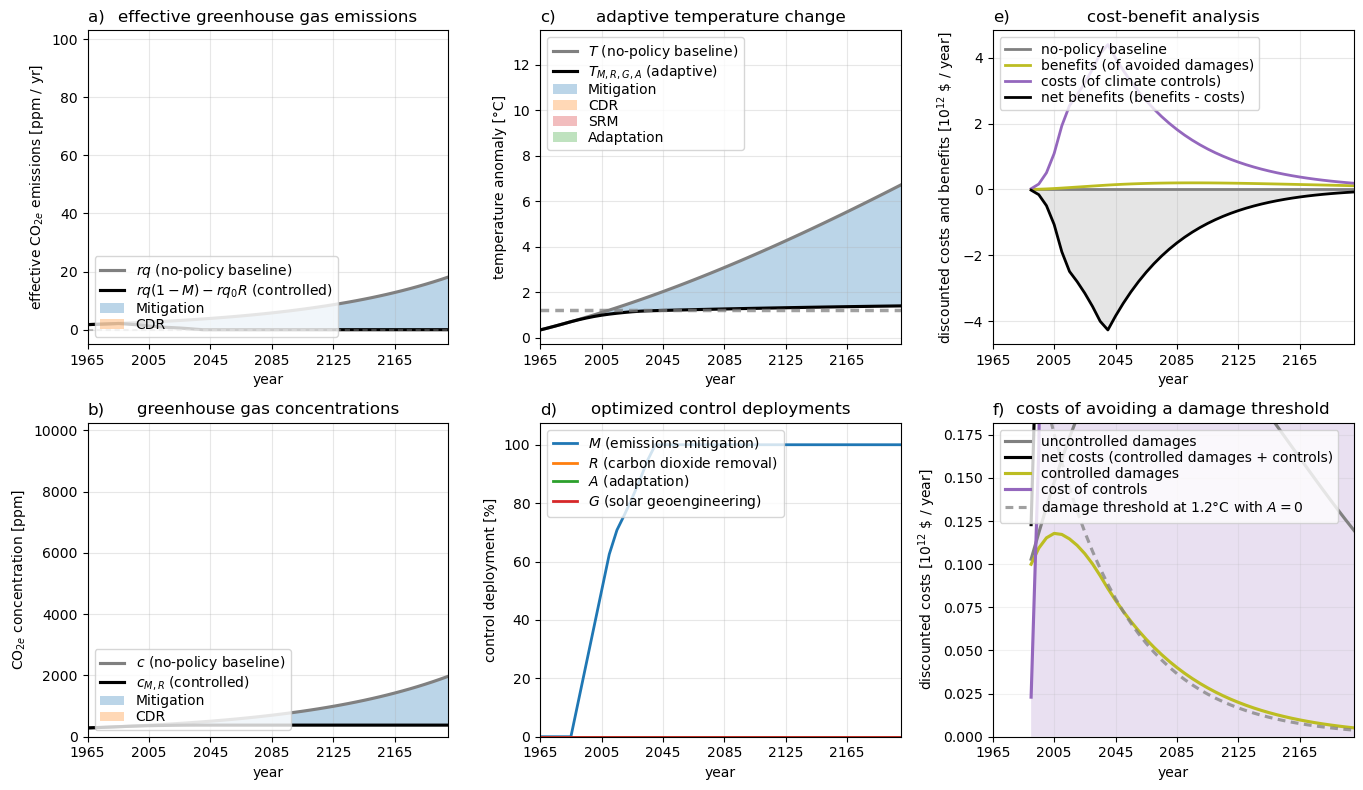

(Figure(PyObject <Figure size 1400x800 with 6 Axes>), PyCall.PyObject[PyObject <AxesSubplot:title={'left':'a)','center':'effective greenhouse gas emissions'}, xlabel='year', ylabel='effective CO$_{2e}$ emissions [ppm / yr]'>, PyObject <AxesSubplot:title={'left':'b)','center':'greenhouse gas concentrations'}, xlabel='year', ylabel='CO$_{2e}$ concentration [ppm]'>, PyObject <AxesSubplot:title={'left':'c)','center':'adaptive temperature change'}, xlabel='year', ylabel='temperature anomaly [°C]'>, PyObject <AxesSubplot:title={'left':'d)','center':'optimized control deployments'}, xlabel='year', ylabel='control deployment [%]'>, PyObject <AxesSubplot:title={'left':'e)','center':'cost-benefit analysis'}, xlabel='year', ylabel='discounted costs and benefits [10$^{12}$ \\$ / year]'>, PyObject <AxesSubplot:title={'left':'f)','center':'costs of avoiding a damage threshold'}, xlabel='year', ylabel='discounted costs [10$^{12}$ \\$ / year]'>])

In [8]:
plot_state(m_temp)

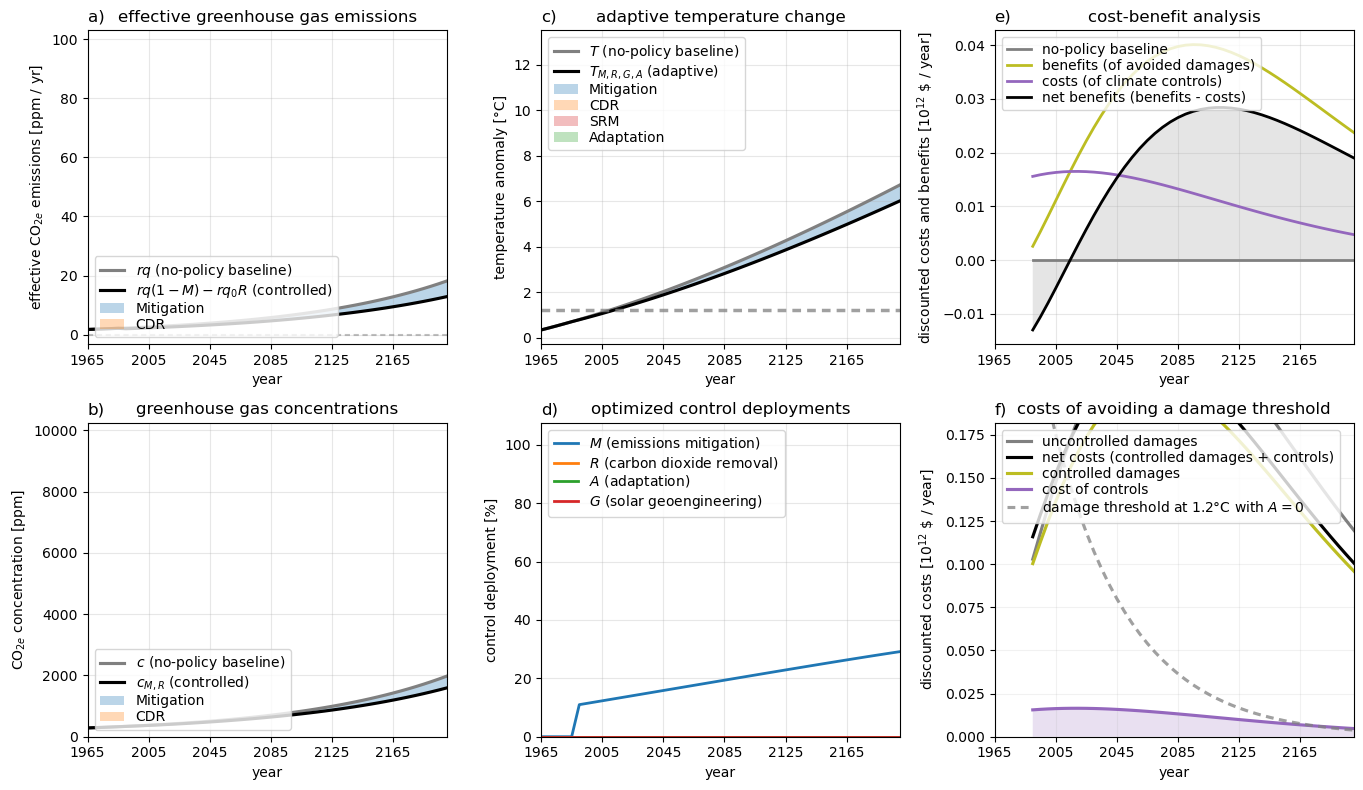

(Figure(PyObject <Figure size 1400x800 with 6 Axes>), PyCall.PyObject[PyObject <AxesSubplot:title={'left':'a)','center':'effective greenhouse gas emissions'}, xlabel='year', ylabel='effective CO$_{2e}$ emissions [ppm / yr]'>, PyObject <AxesSubplot:title={'left':'b)','center':'greenhouse gas concentrations'}, xlabel='year', ylabel='CO$_{2e}$ concentration [ppm]'>, PyObject <AxesSubplot:title={'left':'c)','center':'adaptive temperature change'}, xlabel='year', ylabel='temperature anomaly [°C]'>, PyObject <AxesSubplot:title={'left':'d)','center':'optimized control deployments'}, xlabel='year', ylabel='control deployment [%]'>, PyObject <AxesSubplot:title={'left':'e)','center':'cost-benefit analysis'}, xlabel='year', ylabel='discounted costs and benefits [10$^{12}$ \\$ / year]'>, PyObject <AxesSubplot:title={'left':'f)','center':'costs of avoiding a damage threshold'}, xlabel='year', ylabel='discounted costs [10$^{12}$ \\$ / year]'>])

In [9]:
plot_state(m_opt)